# Present Day Areas

This Jupyter notebook assesses the present day areas of large igneous provinces and builds up the LIP summary table used in the manuscript.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Files

In [2]:
original = pd.read_csv('../Data/LIP_Outline.csv')
original.sort_values('AGE',inplace=True)
original.reset_index(inplace=True,drop=True)

In [3]:
present = pd.read_csv('../Data/LIP_current_extent.csv')
present.sort_values('X_BARCDAGE',inplace=True)
present.reset_index(inplace=True,drop=True)

## LIPs

Start a dataframe:

In [4]:
summary = pd.DataFrame(columns=['name',
                                'type',
                                'age',
                                'age reference',
                                'original area km2',
                                'present area km2',
                                'present area reference',
                                'present/original',
                                'buried'])

Template:

### Columbia River Basalts

Present extent shapefile has data from both Buchan and Ernst (2004) as well as the PLATES database - we chose to use the Buchan and Ernst (2004) (which has present['CAPT_SCALE']==2000000) since they had more detail and included the Eastern Snake River Plain which is included in the original broad LIP outline.

In [5]:
summary.loc['CRB'] = \
    pd.Series({'name':'Columbia River',
               'type':'basaltic',
               'age':16.3,
               'age reference':'Kasbohm and Schoene (2018)',
               'original area km2':np.float(original[original['NAME_EVENT']=='Columbia River']['area_km2']),
               'present area km2':np.sum(present[(present['X_BARCDAGE']==17)&(present['CAPT_SCALE']==2000000)]['area_km2']),
               'present area reference':'Buchan and Ernst (2004)',
               'present/original':(np.sum(present[(present['X_BARCDAGE']==17)&(present['CAPT_SCALE']==2000000)]['area_km2']))/(np.float(original[original['NAME_EVENT']=='Columbia River']['area_km2'])),
               'buried':'no'})

### Afar

The present-day extent for the Afar LIP is from the PLATES database:

Coffin, M.F., Duncan, R.A., Eldholm, O., Fitton, J.G., Frey, F.A., Larsen, H.C., Mahoney, J.J., Saunders, A.D., Schlich, R., and Wallace, P.J., 2006. Large igneous provinces and scientific ocean drilling: Status quo and a look ahead, Oceanography, vol. 19(4), pp. 150-160.

The original extent polygon extends much further north than the exposure of the Ethiopian Traps and includes the Red Sea and its flanks where there are no current exposures included in the PLATES polygons — despite there being some exposure of LIP-related volcanics along the Red Sea flanks. This portion of the LIP could be considered to be buried with the Ethiopian and Yemen plateau volcanics being exposed.

In [6]:
summary.loc['Afar'] = \
    pd.Series({'name':'Afar',
               'type':'basaltic',
               'age':30,
               'age reference':'Courtillot and Renne (2003)',
               'original area km2':np.sum(original[original['NAME_EVENT']=='Afro-Arabian']['area_km2']),
               'present area km2':np.sum(present[present['X_BARCDAGE']==30]['area_km2']),
               'present area reference':'Coffin et al. (2006)',
               'present/original':(np.sum(present[present['X_BARCDAGE']==30]['area_km2']))/(np.sum(original[original['NAME_EVENT']=='Afro-Arabian']['area_km2'])),
               'buried':'partial'})

### Sierra Madre

The Sierra Madre is a silic large igneous province, but along with the rhyolitic volcanics there was mafic and intermediate volcanism. The first major pulse of magmatism was 34 Ma (Bryan and Ferrari, 2013).

In [7]:
summary.loc['SMO'] = \
    pd.Series({'name':'Sierra Madre Occidental',
               'type':'silicic/bimodal',
               'age':34,
               'age reference':'Bryan and Ferrari (2013)',
               'original area km2':np.sum(original[original['NAME_EVENT']=='Sierra Madre Occidental (SLIP)']['area_km2']),
               'present area km2':np.sum(present[present['LIPID']==101]['area_km2']),
               'present area reference':'Bryan and Ferrari (2013)',
               'present/original':np.sum(present[present['LIPID']==101]['area_km2'])/np.sum(original[original['NAME_EVENT']=='Sierra Madre Occidental (SLIP)']['area_km2']),
               'buried':'no'})

### NAIP (North Atlantic Volcanic Province)

The North Atlantic Volcanic Province was associated with succesful rifting. In the Ernst current extent database there were duplicates for nearly all of the polygons with ages assigned both at 62 Ma and 60 Ma. There were also abundant polygons that are within the North Atlantic and are not exposed. These duplicates and submerged polygons were removes in order to determine area. Its extent will be anomalously low due to the potential of coverage by the Greenland ice sheet including the burial of much of it due to successful rifting.

Larsen, L., Pedersen, A., Tegner, C., Duncan, R., Hald, N. and Larsen, J., 2016. Age of Tertiary volcanic rocks on the West Greenland continental margin: volcanic evolution and event correlation to other parts of the North Atlantic Igneous Province. Geological Magazine: 1-25.

In [8]:
summary.loc['NAIP'] = \
    pd.Series({'name':'North Atlantic',
               'type':'basaltic with successful rift',
               'age':62,
               'age reference':'Larsen et al. (2016)',
               'original area km2':np.sum(original[original['AGE']==62]['area_km2']),
               'present area km2':np.sum(present[present['X_BARCDAGE']==62]['area_km2']),
               'present area reference':'Buchan and Ernst (2004), Coffin et al. (2006)',
               'present/original':(np.sum(present[present['X_BARCDAGE']==62]['area_km2']))/(np.sum(original[original['AGE']==62]['area_km2'])),
               'buried':'partial'})

### Deccan

In [9]:
summary.loc['Deccan'] = \
    pd.Series({'name':'Deccan',
               'type':'basaltic',
               'age':66,
               'age reference':'Schoene (2015)',
               'original area km2':np.float(original[original['NAME_PART']=='Deccan']['area_km2']),
               'present area km2':np.sum(present[present['X_BARCDAGE']==65]['area_km2']),
               'present area reference':'Coffin et al. (2006)',
               'present/original':(np.sum(present[present['X_BARCDAGE']==65]['area_km2']))/(np.float(original[original['NAME_PART']=='Deccan']['area_km2'])),
               'buried':'no'})

### Seychelles

In [10]:
summary.loc['Seychelles'] = \
    pd.Series({'name':'Seychelles',
               'type':'basaltic and buried',
               'age':66,
               'age reference':'',
               'original area km2':np.sum(original[original['NAME_PART']=='Chagos-Laccadive (3000M & gravity contour)']['area_km2']),
               'present area km2':0,
               'present area reference':'Coffin et al. (2006)',
               'present/original':0,
               'buried':'yes'})

### Madagascar

In [11]:
summary.loc['Madagascar'] = \
    pd.Series({'name':'Madagascar',
               'type':'basaltic',
               'age':90,
               'age reference':'Cucciniello et al. (2010)',
               'original area km2':np.float(original[original['NAME_EVENT']=='Madagascar']['area_km2']),
               'present area km2':np.sum(present[present['X_BARCDAGE']==91]['area_km2']),
               'present area reference':'Coffin et al. (2006)',
               'present/original':(np.sum(present[present['X_BARCDAGE']==91]['area_km2']))/(np.float(original[original['NAME_EVENT']=='Madagascar']['area_km2'])),
               'buried':'no'})

### Carribean-Columbian

In [12]:
summary.loc['Carribean_Columbian'] = \
    pd.Series({'name':'Carribean-Columbian',
               'type':'basaltic',
               'age':94,
               'age reference':'Loewen et al. (2013)',
               'original area km2':np.sum(original[original['NAME_EVENT']=='Caribbean-Colombian']['area_km2']),
               'present area km2':np.sum(present[present['X_BARCDAGE']==88]['area_km2']),
               'present area reference':'Coffin et al. (2006)',
               'present/original':(np.sum(present[present['X_BARCDAGE']==88]['area_km2']))/(np.sum(original[original['NAME_EVENT']=='Caribbean-Colombian']['area_km2'])),
               'buried':'no'})

### High Arctic

Used LiMW to get the present day area - basaltic polygons corresponding to the HALIP.

In [13]:
HALIP = pd.read_csv('../Data/HALIP_extent.csv')

In [14]:
summary.loc['HALIP'] = \
    pd.Series({'name':'High Arctic',
               'type':'basaltic',
               'age':95,
               'age reference':'Kingsbury et al. (2018)',
               'original area km2':np.sum(original[original['AGE_TEXT']=='120-90 Ma']['area_km2']),
               'present area km2':np.sum(HALIP['area_km2']),
               'present area reference':'Moosdorf and Hartmann (2015)',
               'present/original':(np.sum(HALIP['area_km2']))/(np.sum(original[original['AGE_TEXT']=='120-90 Ma']['area_km2'])),
               'buried':'no'})

### Maud Rise

Does not intersect the CEED6 polygons.

### Bunbury - COME BACK TO THIS - NOT IN ORIGINAL YET

Original area manually georeferences from Ernst et al. (2017):

### EQUAMP

In [15]:
summary.loc['EQUAMP'] = \
    pd.Series({'name':'Equatorial Atlantic Magmatic Province',
               'type':'basaltic',
               'age':131,
               'age reference':'Hollanda et al. (2016)',
               'original area km2':np.sum(original[original['NAME_EVENT']=='EQUAMP (Equatorial Atlantic Magmatic Province)']['area_km2']),
               'present area km2':np.sum(present[(present['X_NAME_EVE']=='130 Ma (EQUAMP)')|(present['X_NAME_EVE']=='EQUAMP (Equatorial Atlantic Magmatic Province)')]['area_km2']),
               'present area reference':'Hollanda et al. (2016)',
               'present/original':(np.sum(present[(present['X_NAME_EVE']=='130 Ma (EQUAMP)')|(present['X_NAME_EVE']=='EQUAMP (Equatorial Atlantic Magmatic Province)')]['area_km2']))/(np.sum(original[original['NAME_EVENT']=='EQUAMP (Equatorial Atlantic Magmatic Province)']['area_km2'])),
               'buried':'no'})

### Parana-Etendeka

In [16]:
Parana = present[(present['X_BARCDAGE']==134)&(present['X_NAME_EVE']!='130 Ma (EQUAMP)')&(present['X_NAME_EVE']!='EQUAMP (Equatorial Atlantic Magmatic Province)')]

In [17]:
Etendeka = present[present['X_BARCDAGE']==138]

In [18]:
summary.loc['Parana_Etendeka'] = \
    pd.Series({'name':'Parana-Etendeka',
               'type':'basaltic',
               'age':135,
               'age reference':'Florisbal et al. (2014)',
               'original area km2':np.sum(original[(original['AGE']==134)&(original['NAME_EVENT']!='EQUAMP (Equatorial Atlantic Magmatic Province)')]['area_km2']),
               'present area km2':np.sum(Parana['area_km2'])+np.sum(Etendeka['area_km2']),
               'present area reference':'Teixeira and Albrez (2017), Coffin et al. (2016)',
               'present/original':(np.sum(Parana['area_km2'])+np.sum(Etendeka['area_km2']))/(np.sum(original[(original['AGE']==134)&(original['NAME_EVENT']!='EQUAMP (Equatorial Atlantic Magmatic Province)')]['area_km2'])),
               'buried':'partial'})

### Trap

The only exposure of the Trap are dikes (no flood basalts).

In [19]:
summary.loc['Trap'] = \
    pd.Series({'name':'Trap',
               'type':'basaltic',
               'age':140,
               'age reference':'Ernst et al. (2001)',
               'original area km2':np.float(original[original['NAME_EVENT']=='Trap']['area_km2']),
               'present area km2':0,
               'present area reference':'Ernst and Buchan (2001)',
               'present/original':0,
               'buried':'no'})

### Sorachi

Not included since it is an accreted oceanic plateau.

### NW Australia Margin

There are offshore intrusions and basalts, but no current exposure on land.

In [20]:
summary.loc['NW_Aus'] = \
    pd.Series({'name':'NW Australia Margin',
               'type':'basaltic',
               'age':160,
               'age reference':'',
               'original area km2':np.float(original[original['NAME_EVENT']=='NW Australian Margin']['area_km2']),
               'present area km2':0,
               'present area reference':'Coffin et al. (2006)',
               'present/original':0,
               'buried':'fully buried'})

### Chon Aike - COME BACK TO THIS - NOT IN ORIGINAL YET

No current compilation of present day exposure:

### Karoo

Present day area includes both volcanics and sills

In [21]:
Karoo = present[present['REF_LINE']=='from ArcGIS compilation produced under LIPs Project contract to M. de Kock']
Karoo = Karoo[Karoo['X_NAME_EVE']=='Karoo LIP']

In [22]:
summary.loc['Karoo'] = \
    pd.Series({'name':'Karoo',
               'type':'basaltic',
               'age':183,
               'age reference':'Burgess et al. (2015)',
               'original area km2':np.float(original[original['NAME_EVENT']=='Karoo']['area_km2']),
               'present area km2':np.sum(Karoo['area_km2']),
               'present area reference':'de Kock compilation',
               'present/original':(np.sum(present[present['X_NAME_EVE']=='Karoo LIP']['area_km2']))/(np.float(original[original['NAME_EVENT']=='Karoo']['area_km2'])),
               'buried':'no'})

### Ferrar

No current compilation of present day exposure:

In [23]:
summary.loc['Ferrar'] = \
    pd.Series({'name':'Ferrar',
               'type':'basaltic',
               'age':183,
               'age reference':'Burgess et al. (2015)',
               'original area km2':np.sum(original[original['NAME_EVENT']=='Ferrar']['area_km2']),
               'present area km2':np.nan,
               'present area reference':'',
               'present/original':np.nan,
               'buried':'no'})

### Angayucham

No current compilation of present day exposure:

In [24]:
summary.loc['Angayucham'] = \
    pd.Series({'name':'Angayucham',
               'type':'basaltic',
               'age':np.nan,
               'age reference':'',
               'original area km2':np.float(original[original['NAME_EVENT']=='Angayucham']['area_km2']),
               'present area km2':np.nan,
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### Wrangellia

No current compilation of present day exposure:

In [25]:
summary.loc['Wrangellia'] = \
    pd.Series({'name':'Wrangellia',
               'type':'basaltic',
               'age':np.nan,
               'age reference':'',
               'original area km2':np.sum(original[original['NAME_EVENT']=='Wrangellia']['area_km2']),
               'present area km2':np.nan,
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### CAMP

Present day extent includes lavas and sills:

In [26]:
CAMP = present[present['REF_LINE']=='from ArcGIS CAMP compilation of A. Marzoli & L. Parisio produced under contract to LIPs-Reconstruction Project']

In [27]:
summary.loc['CAMP'] = \
    pd.Series({'name':'CAMP',
               'type':'basaltic',
               'age':201,
               'age reference':'Blackburn et al. (2013)',
               'original area km2':np.sum(original[original['AGE']==201]['area_km2']),
               'present area km2':np.sum(CAMP['area_km2']),
               'present area reference':'Marzoli and Parisio compilation',
               'present/original':(np.sum(CAMP['area_km2']))/(np.sum(original[original['AGE']==201]['area_km2'])),
               'buried':'partial'})

### Siberia

We are using the PLATES compilation for now, but we could perhaps do a better job using LiMW.

In [28]:
Siberia = present[present['X_NAME_EVE']=='Siberian Trap LIP']
Siberia = Siberia[Siberia['REF_LINE']=='http://www.ig.utexas.edu/research/projects/plates/data/LIPS/Data/About.Data   M.F. Coffin, U. Texas']

In [29]:
summary.loc['Siberia'] = \
    pd.Series({'name':'Siberia',
               'type':'basaltic',
               'age':251,
               'age reference':'',
               'original area km2':np.float(original[original['NAME_EVENT']=='Siberian Trap LIP']['area_km2']),
               'present area km2':np.sum(Siberia['area_km2']),
               'present area reference':'Coffin et al. (2006)',
               'present/original':(np.sum(Siberia['area_km2']))/(np.float(original[original['NAME_EVENT']=='Siberian Trap LIP']['area_km2'])),
               'buried':''})

### Emeishan

Present day polygons are a little low resolution, which may be artificially increasing their area.

In [30]:
summary.loc['Emeishan'] = \
    pd.Series({'name':'Emeishan',
               'type':'basaltic',
               'age':259,
               'age reference':'',
               'original area km2':np.float(original[original['NAME_EVENT']=='Emeishan']['area_km2']),
               'present area km2':np.sum(present[present['X_LIPNAME']=='Emeishan basaltic volcanics']['area_km2']),
               'present area reference':'',
               'present/original':(np.sum(present[present['X_LIPNAME']=='Emeishan basaltic volcanics']['area_km2']))/(np.float(original[original['NAME_EVENT']=='Emeishan']['area_km2'])),
               'buried':''})

### Tarim

No current compilation of present day exposure:

In [31]:
summary.loc[''] = \
    pd.Series({'name':'',
               'type':'',
               'age':280,
               'age reference':'',
               'original area km2':'',
               'present area km2':'',
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### Panjal-Qiangtang

No current compilation of present day exposure:

In [32]:
summary.loc[''] = \
    pd.Series({'name':'',
               'type':'',
               'age':280,
               'age reference':'',
               'original area km2':'',
               'present area km2':'',
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### Kennedy-Conners-Auburn

No current compilation of present day exposure:

In [33]:
summary.loc[''] = \
    pd.Series({'name':'',
               'type':'',
               'age':320,
               'age reference':'',
               'original area km2':'',
               'present area km2':'',
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### Magdalen

No current compilation of present day exposure:

In [34]:
summary.loc['Magdalen'] = \
    pd.Series({'name':'Magdalen',
               'type':'',
               'age':360,
               'age reference':'',
               'original area km2':'',
               'present area km2':'',
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### Vilyui

No current compilation of present day exposure:

In [35]:
summary.loc[''] = \
    pd.Series({'name':'',
               'type':'',
               'age':370,
               'age reference':'',
               'original area km2':'',
               'present area km2':'',
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### Kola-Kneiper

No current compilation of present day exposure:

In [36]:
summary.loc[''] = \
    pd.Series({'name':'',
               'type':'',
               'age':377,
               'age reference':'',
               'original area km2':'',
               'present area km2':'',
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### Suordakh

No current compilation of present day exposure:

In [37]:
summary.loc[''] = \
    pd.Series({'name':'',
               'type':'',
               'age':450,
               'age reference':'',
               'original area km2':'',
               'present area km2':'',
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### Kalkarindji

Patchy/incomplete current compilation of present day exposure:

In [38]:
Kalkarindji = present[present['X_NAME_EVE']=='Kalkarindji']

In [39]:
summary.loc['Kalkarindji'] = \
    pd.Series({'name':'Kalkarindji',
               'type':'basaltic',
               'age':511,
               'age reference':'',
               'original area km2':np.float(original[original['NAME_EVENT']=='Kalkarindji']['area_km2']),
               'present area km2':np.sum(present[present['X_NAME_EVE']=='Kalkarindji']['area_km2']),
               'present area reference':'',
               'present/original':np.nan,
               'buried':''})

### Franklin

Could be filtered by "DESCRIPT" field to be volcanics - including sills and volcanics right now

In [40]:
summary.loc['Franklin'] = \
    pd.Series({'name':'Franklin',
               'type':'',
               'age':720,
               'age reference':'',
               'original area km2':np.sum(original[original['NAME_EVENT']=='Franklin']['area_km2']),
               'present area km2':np.sum(present[present['X_NAME_EVE']=='Franklin']['area_km2']),
               'present area reference':'',
               'present/original':(np.sum(present[present['X_NAME_EVE']=='Franklin']['area_km2']))/(np.sum(original[original['NAME_EVENT']=='Franklin']['area_km2'])),
               'buried':''})

In [41]:
summary

,name,type,age,age reference,original area km2,present area km2,present area reference,present/original,buried
CRB,Columbia River,basaltic,16.3,Kasbohm and Schoene (2018),676421,375545,Buchan and Ernst (2004),0.555194,no
Afar,Afar,basaltic,30.0,Courtillot and Renne (2003),2.01275e+06,631289,Coffin et al. (2006),0.313645,partial
SMO,Sierra Madre Occidental,silicic/bimodal,34.0,Bryan and Ferrari (2013),1.97004e+06,619622,Bryan and Ferrari (2013),0.314523,no
NAIP,North Atlantic,basaltic with successful rift,62.0,Larsen et al. (2016),1.05542e+06,291288,"Buchan and Ernst (2004), Coffin et al. (2006)",0.275993,partial
Deccan,Deccan,basaltic,66.0,Schoene (2015),698134,561434,Coffin et al. (2006),0.804193,no
Seychelles,Seychelles,basaltic and buried,66.0,,391346,0,Coffin et al. (2006),0.000000,yes
Madagascar,Madagascar,basaltic,90.0,Cucciniello et al. (2010),617886,31289,Coffin et al. (2006),0.050639,no
Carribean_Columbian,Carribean-Columbian,basaltic,94.0,Loewen et al. (2013),696879,126149,Coffin et al. (2006),0.181020,no
HALIP,High Arctic,basaltic,95.0,Kingsbury et al. (2018),3.59789e+06,149571,Moosdorf and Hartmann (2015),0.041572,no
EQUAMP,Equatorial Atlantic Magmatic Province,basaltic,131.0,Hollanda et al. (2016),660291,7908,Hollanda et al. (2016),0.011977,no


In [42]:
original[130:170]

,ID,Type_C_0_S,NAME_EVENT,NAME_ALT,CRUST_BLK,AGE_TEXT,NAME_PART,COMMENT,AGE,area_km2
130,0,C,CIMP 590-560 Ma pulse,NaN,Laurentia,580,CIMP 590-560 Ma pulse,NaN,580,3.584610e+05
131,0,C,Grenville-Rideau (Middle Central-Iapetus),NaN,Laurentia,590 Ma,Grenville-Rideau (Middle Central-Iapetus),NaN,590,1.599784e+05
132,0,C,Biryusa-2,NaN,Siberia,612 Ma,Biryusa-2,NaN,612,3.857908e+04
133,0,C,Baltoscandian - Egersund,NaN,Baltica,616 Ma,Egersund,NaN,615,1.449712e+04
134,0,C,CIMP - 615 Ma pulse,NaN,Laurentia,615,CIMP - 615 Ma pulse,NaN,615,9.739708e+04
135,0,C,Long Range (Early Central-Iapetus),NaN,Laurentia,615 Ma,Long Range (Early Central-Iapetus),NaN,615,8.395273e+04
136,0,C,Baltoscandian - Egersund,NaN,Baltica,616 Ma,Baltoscandian,NaN,615,6.036609e+04
137,0,C,Kikitat,NaN,North America (Alaska),715 Ma,NaN,NaN,715,2.350763e+03
138,0,C,Irkutsk,NaN,Siberian craton,720,dykes,NaN,720,3.034952e+05
139,0,C,Mutare,NaN,Kalahari craton,725 Ma,Mutare,NaN,725,4.930246e+04


In [43]:
summary

,name,type,age,age reference,original area km2,present area km2,present area reference,present/original,buried
CRB,Columbia River,basaltic,16.3,Kasbohm and Schoene (2018),676421,375545,Buchan and Ernst (2004),0.555194,no
Afar,Afar,basaltic,30.0,Courtillot and Renne (2003),2.01275e+06,631289,Coffin et al. (2006),0.313645,partial
SMO,Sierra Madre Occidental,silicic/bimodal,34.0,Bryan and Ferrari (2013),1.97004e+06,619622,Bryan and Ferrari (2013),0.314523,no
NAIP,North Atlantic,basaltic with successful rift,62.0,Larsen et al. (2016),1.05542e+06,291288,"Buchan and Ernst (2004), Coffin et al. (2006)",0.275993,partial
Deccan,Deccan,basaltic,66.0,Schoene (2015),698134,561434,Coffin et al. (2006),0.804193,no
Seychelles,Seychelles,basaltic and buried,66.0,,391346,0,Coffin et al. (2006),0.000000,yes
Madagascar,Madagascar,basaltic,90.0,Cucciniello et al. (2010),617886,31289,Coffin et al. (2006),0.050639,no
Carribean_Columbian,Carribean-Columbian,basaltic,94.0,Loewen et al. (2013),696879,126149,Coffin et al. (2006),0.181020,no
HALIP,High Arctic,basaltic,95.0,Kingsbury et al. (2018),3.59789e+06,149571,Moosdorf and Hartmann (2015),0.041572,no
EQUAMP,Equatorial Atlantic Magmatic Province,basaltic,131.0,Hollanda et al. (2016),660291,7908,Hollanda et al. (2016),0.011977,no


Drop buried before exponential fit

In [49]:
from scipy.optimize import curve_fit

def func(x, b):
    return np.exp(-x / b)

In [64]:
clean_summary = summary.dropna()


In [61]:
ages = clean_summary['age'].tolist()
area_ratio = clean_summary['present/original'].tolist()

In [63]:
fit_y

(array([0.02387407]), array([[1.98229174e-05]]))

TypeError: func() takes 2 positional arguments but 3 were given

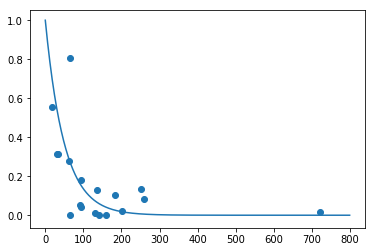

In [65]:
x = np.arange(0,800)
y = np.exp(-x/50)

coeffs = curve_fit(func, ages, area_ratio)

plt.scatter(ages,area_ratio)
plt.plot(x,y, c='C0')
plt.plot(ages,func(ages, *coeffs),c='C1')
plt.ylabel('fraction of LIP area exposed')
plt.xlabel('time since LIP emplacement')
plt.ylim(0,1)
plt.xlim(0,800)
plt.show()